In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

#warnings.filterwarnings('ignore')

In [5]:

pd.options.display.float_format = '{:.2f}'.format 

In [6]:
Data = pd.read_csv('loan.csv')
Data.head()


C:\Users\karray mariem\AppData\Local\Temp\ipykernel_17796\369844038.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [7]:
Data.shape

(39717, 111)

In [8]:
Data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
Data.columns.values.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [10]:
Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [11]:
Data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


In [12]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(Data.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(Data.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
54


In [13]:
#Review the Null value %
round(Data.isnull().sum()/len(Data)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [14]:
null_df = pd.DataFrame(Data.isnull().sum()/len(Data)).reset_index()

In [15]:
null_df

,index,0
0,id,0.00
1,member_id,0.00
2,loan_amnt,0.00
3,funded_amnt,0.00
4,funded_amnt_inv,0.00
...,...,...
106,tax_liens,0.00
107,tot_hi_cred_lim,1.00
108,total_bal_ex_mort,1.00
109,total_bc_limit,1.00


In [35]:
#remove the null values above 75% from loan dataframe
null_df = pd.DataFrame(Data.isnull().sum()/len(Data)).reset_index()
null_list = list(null_df['index'][null_df[0]>= 0.75])
null_list

[]

In [17]:
Data.drop(null_list,axis=1,inplace=True)

In [18]:
round(Data.isnull().sum()/len(Data)*100)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.00
emp_length                    3.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         33.00
purpose                       0.00
title                         0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [19]:
Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [20]:
Data.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [21]:
#Categorizing columns based on data points available pre loan and post loan and removing the post loan 
#variables for our analysis on drivers for loan acceptance. In addition dropping columns which arent # useful (id, url, title)

In [22]:
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
Data.drop(labels = columns_drop_list3, axis =1, inplace=True)

In [23]:
Data.shape

(39717, 50)

In [24]:
Data['int_rate'] = Data['int_rate'].astype(str)

Data['revol_util'] = Data['revol_util'].astype(str)

# Lets remove % symbol from intrest rate column so that it can be used in calculations
Data['int_rate'] = Data['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
Data['revol_util'] = Data['revol_util'].str.rstrip('%')

In [25]:
Data['emp_length'] = Data['emp_length'].astype(str)
Data.emp_length.fillna('0',inplace=True)
Data['emp_length']=Data.emp_length.str.extract('(\d+)')
Data.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00


In [26]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
Data[cols1] = Data[cols1].apply(pd.to_numeric)

In [27]:
Data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [28]:

# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

Data.issue_d = pd.to_datetime(Data.issue_d, format='%b-%y')
Data['year']=Data['issue_d'].dt.year
Data['month']=Data['issue_d'].dt.month

Data.head(1)

# Observations
# Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10.00,...,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,2011,12


In [30]:
Data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

### Employement length

In [26]:
Data['emp_length'].value_counts()

10.00    8879
1.00     7823
2.00     4388
3.00     4095
4.00     3436
5.00     3282
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: emp_length, dtype: int64

In [27]:

Data.replace('n/a', np.nan,inplace=True)

In [28]:
Data.emp_length.fillna(value=0,inplace=True)
set(Data["emp_length"])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}

In [29]:
Data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Data['emp_length'] = Data['emp_length'].astype(int)
set(Data["emp_length"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

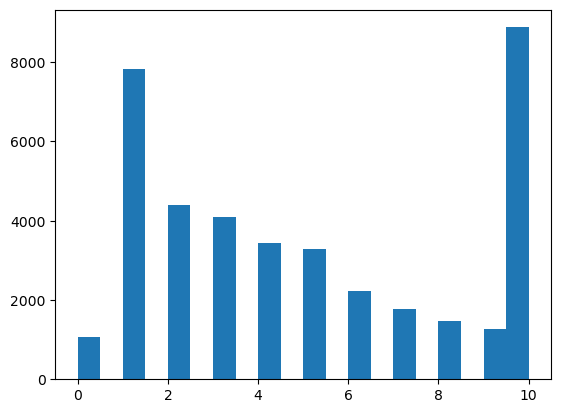

In [30]:
plt.hist(Data.emp_length,bins=20)
plt.show()

In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   loan_amnt                   39717 non-null  int64         
 2   funded_amnt                 39717 non-null  int64         
 3   funded_amnt_inv             39717 non-null  float64       
 4   term                        39717 non-null  object        
 5   int_rate                    39717 non-null  float64       
 6   installment                 39717 non-null  float64       
 7   grade                       39717 non-null  object        
 8   sub_grade                   39717 non-null  object        
 9   emp_length                  39717 non-null  int32         
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

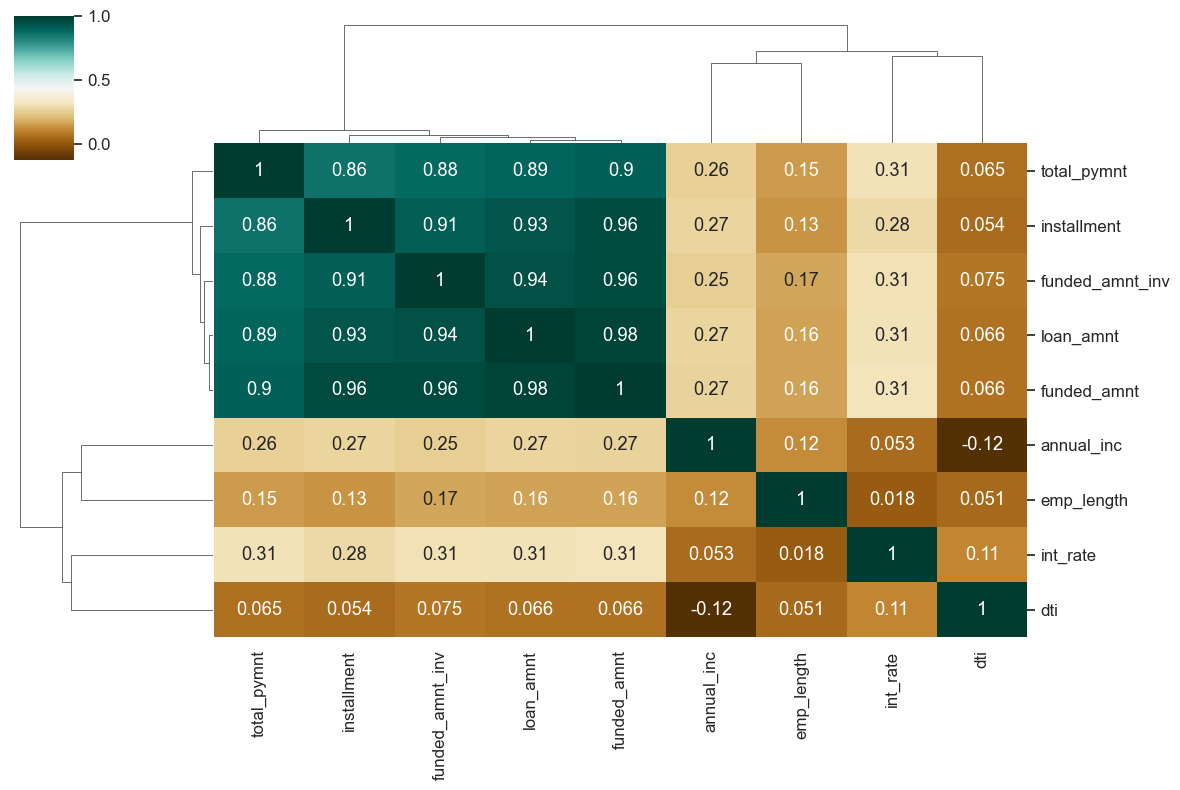

In [32]:
loan_correlation = Data[cols1].corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()


In [33]:
# we found that funded amount and the funded amount investement are highly corrolated

In [34]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_drop_list4 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
Data.drop(labels = columns_drop_list4, axis =1, inplace=True)
print(Data.shape)
Data.isnull().sum()

(39717, 47)


id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
desc                          12940
purpose                           0
title                            11
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                   

In [35]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
Data['loan_amnt_cats'] = pd.cut(Data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
Data['annual_inc_cats'] = pd.cut(Data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
Data['int_rate_cats'] = pd.cut(Data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
Data['dti_cats'] = pd.cut(Data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [36]:
# Lets take a look on shape and data
print(Data.shape)
Data.head(1)
# Observation is we have created extra 5 columns after dropping many./


(39717, 51)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,0,0.00,0,0.00,2011,12,0-7000,20000-40000,10-13,NaN


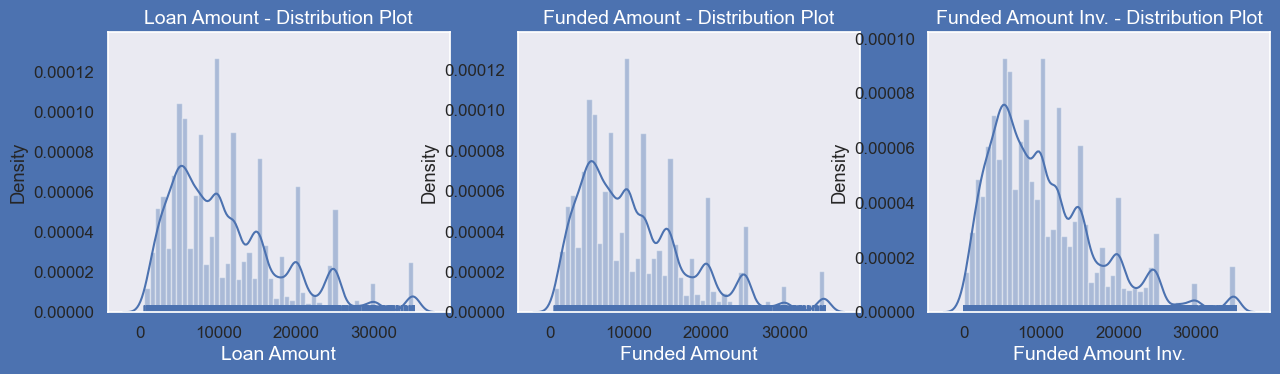

In [37]:
# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(Data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(Data['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(Data['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.


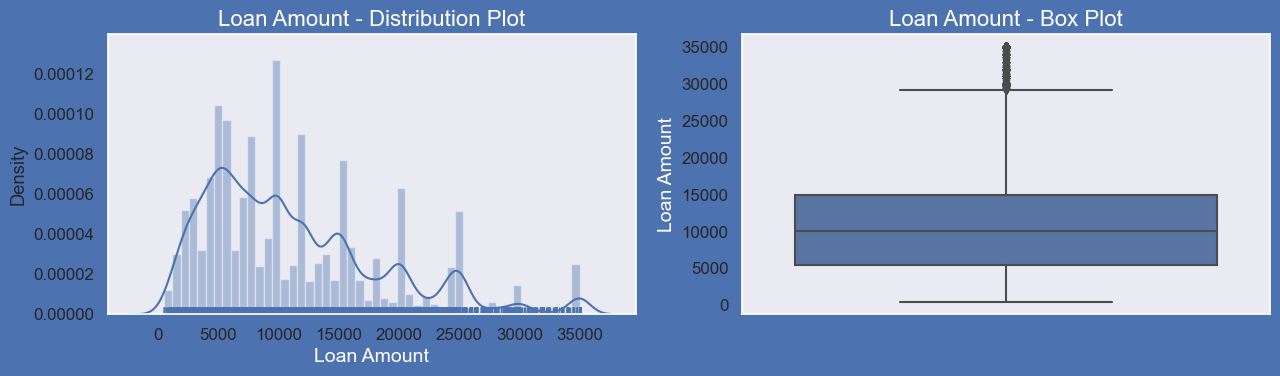

In [38]:

# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(Data['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=Data['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

### Grade

In [39]:
unique_grades = Data['grade'].unique()
grade_sum = unique_grades.sum()
print(f'unique grades',unique_grades)
print(f'grade_sum',grade_sum)

unique grades ['B' 'C' 'A' 'E' 'F' 'D' 'G']
grade_sum BCAEFDG


In [40]:
list_of_grades = ['A','B','C','D','E','F','G']
Data['grade']=pd.Categorical(Data['grade'], categories= list_of_grades, ordered = True)
Data.sort_values('grade', inplace = True)

Text(0.5, 0, 'installment')

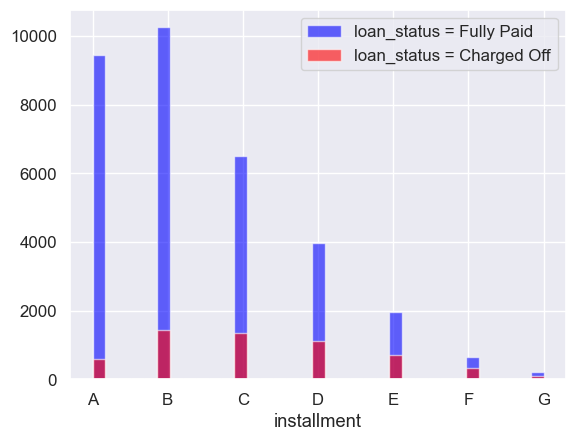

In [41]:

plt.subplot()
Data[Data["loan_status"]=="Fully Paid"]["grade"].hist(bins = 35, color = "blue", label = "loan_status = Fully Paid", alpha =0.6)
Data[Data["loan_status"]=="Charged Off"]["grade"].hist(bins = 35, color = "red", label = "loan_status = Charged Off", alpha = 0.6 )
plt.legend()
plt.xlabel("installment")

### Loan Status

In [42]:
Data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

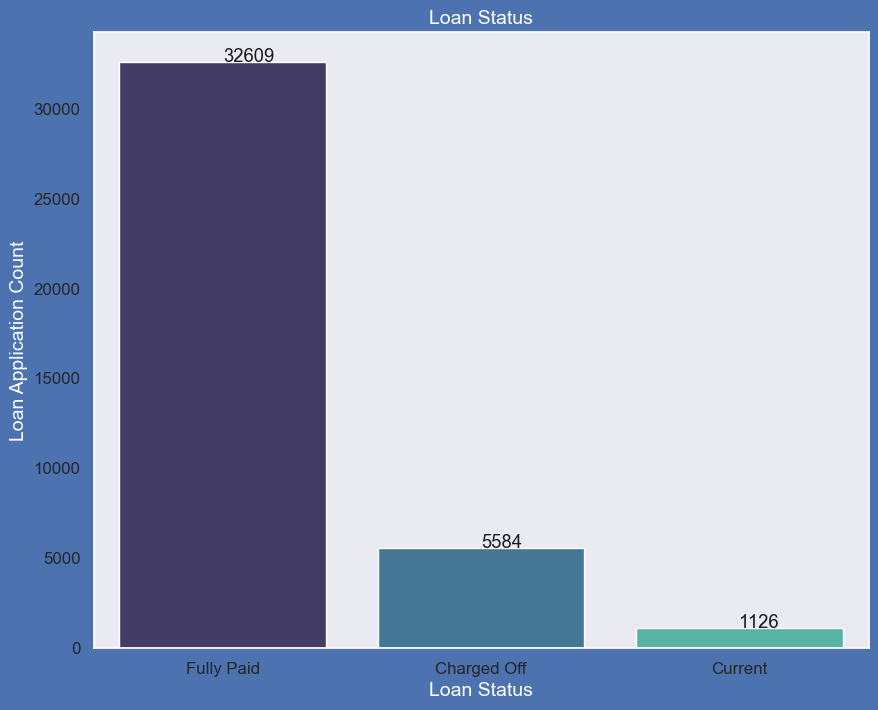

In [76]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=Data,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=Data['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

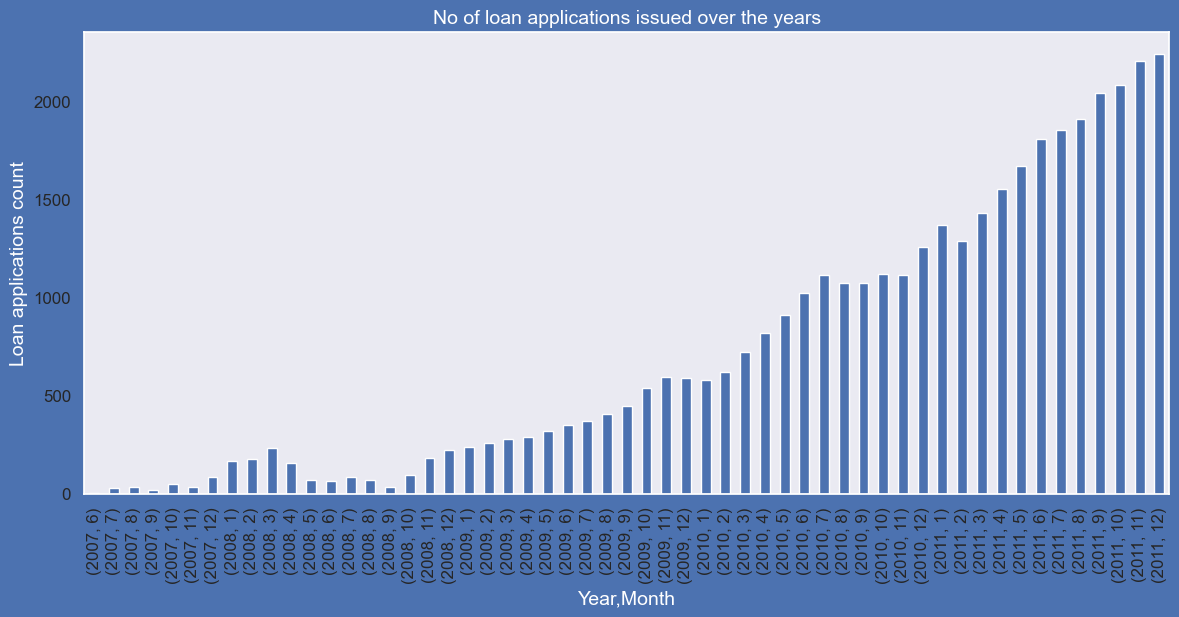

In [78]:
# Derived Column - Ordered Categorical Variables
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.
plt.figure(figsize=(14,6),facecolor='b')
Data.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()


# Observation is that count of loan application is increasing every passing year.
# so increase in number of loan applications are adding more to number of charged off applications.
# number of loans issued in 2008( May-October) got dipped, may be due to Recession.


In [51]:
# we are working on the credit risk so we need to keep only the data related to the Fully Paid or Charged off Loan status 

In [52]:
Df= Data[(Data['loan_status']== 'Fully Paid') |
        (Data['loan_status']== 'Charged Off')]
mapping_dictionary ={'loan_status':{'Fully Paid':0 , 'Charged Off':1}}
Df = Df.replace(mapping_dictionary)

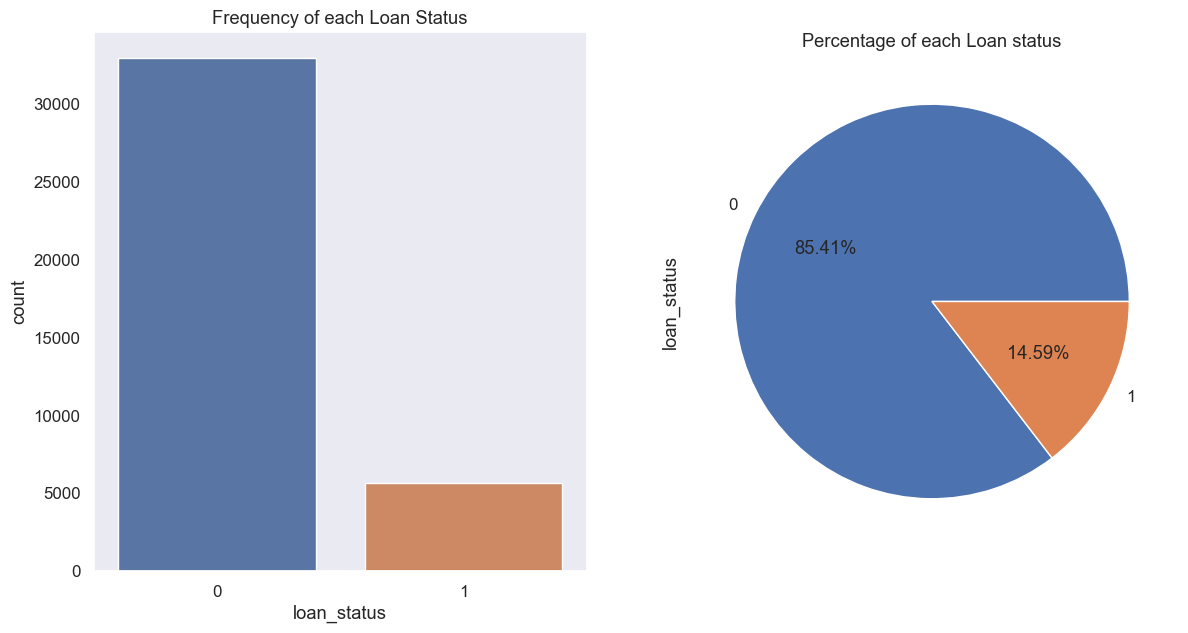

In [53]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=Df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
Df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [55]:
Df['loan_status'] = labelencoder.fit_transform(Df['loan_status'])
Df['loan_status']

16923    0
7706     0
21357    0
7708     0
7709     0
        ..
22925    0
24635    0
5964     1
5966     0
28627    0
Name: loan_status, Length: 38577, dtype: int64

In [56]:
Df[["loan_status", "grade"]].groupby(["grade"], as_index=True).mean()

,loan_status
grade,
A,0.06
B,0.12
C,0.17
D,0.22
E,0.27
F,0.33
G,0.34


In [57]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 16923 to 28627
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   loan_amnt                   38577 non-null  int64         
 2   funded_amnt                 38577 non-null  int64         
 3   funded_amnt_inv             38577 non-null  float64       
 4   term                        38577 non-null  object        
 5   int_rate                    38577 non-null  float64       
 6   grade                       38577 non-null  category      
 7   sub_grade                   38577 non-null  object        
 8   emp_length                  38577 non-null  int32         
 9   home_ownership              38577 non-null  object        
 10  annual_inc                  38577 non-null  float64       
 11  verification_status         38577 non-null  object

In [58]:
Df['int_rate'] = Df['int_rate'].astype(str)

Df['revol_util'] = Df['revol_util'].astype(str)

# Lets remove % symbol from intrest rate column so that it can be used in calculations
Df['int_rate'] = Df['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
Df['revol_util'] = Df['revol_util'].str.rstrip('%')

## Loan Amount

In [59]:
Data['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

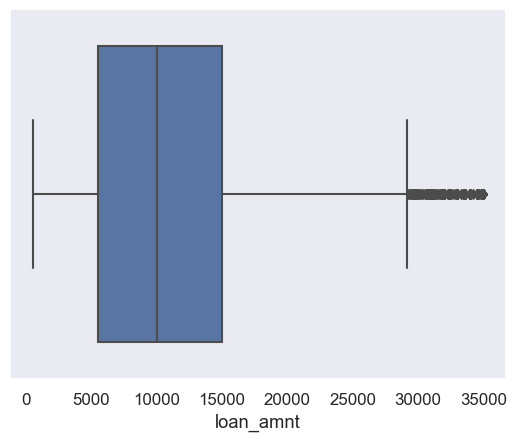

In [60]:
sns.boxplot(Data.loan_amnt)

In [61]:
# Basic statistics with .describe() -Quantitative Variables
Data.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

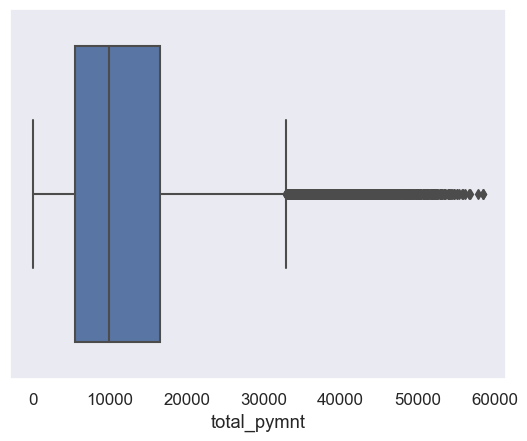

In [62]:
sns.boxplot(Data.total_pymnt)

In [63]:
# Basic statistics with .describe() -Quantitative Variables

print('Before Removal of Outliers :\n')
print(Data['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

Data = Data[Data["annual_inc"] < Data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(Data["annual_inc"].describe())

# Now below data looks much better. Lets plot later and find some conclusions

Before Removal of Outliers :

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


### Interest rate

In [64]:
Data['int_rate'] = Data['int_rate'].astype(str)

Data['revol_util'] = Data['revol_util'].astype(str)

# Lets remove % symbol from intrest rate column so that it can be used in calculations
Data['int_rate'] = Data['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
Data['revol_util'] = Data['revol_util'].str.rstrip('%')

In [65]:
Data['int_rate'] = Data['int_rate'].astype(float)

In [66]:
Data['int_rate'].describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

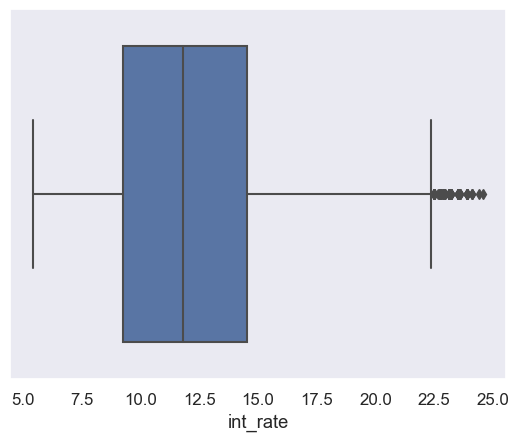

In [70]:
sns.boxplot(Data.int_rate)

### Term 

In [72]:
Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39319 entries, 16923 to 28627
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39319 non-null  int64         
 1   loan_amnt                   39319 non-null  int64         
 2   funded_amnt                 39319 non-null  int64         
 3   funded_amnt_inv             39319 non-null  float64       
 4   term                        39319 non-null  object        
 5   int_rate                    39319 non-null  float64       
 6   grade                       39319 non-null  category      
 7   sub_grade                   39319 non-null  object        
 8   emp_length                  39319 non-null  int32         
 9   home_ownership              39319 non-null  object        
 10  annual_inc                  39319 non-null  float64       
 11  verification_status         39319 non-null  object

In [34]:
# Lets remove % symbol from intrest rate column so that it can be used in calculations
Df['int_rate'] = Df['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
Df['revol_util'] = Df['revol_util'].str.rstrip('%')

NameError: name 'Df' is not defined

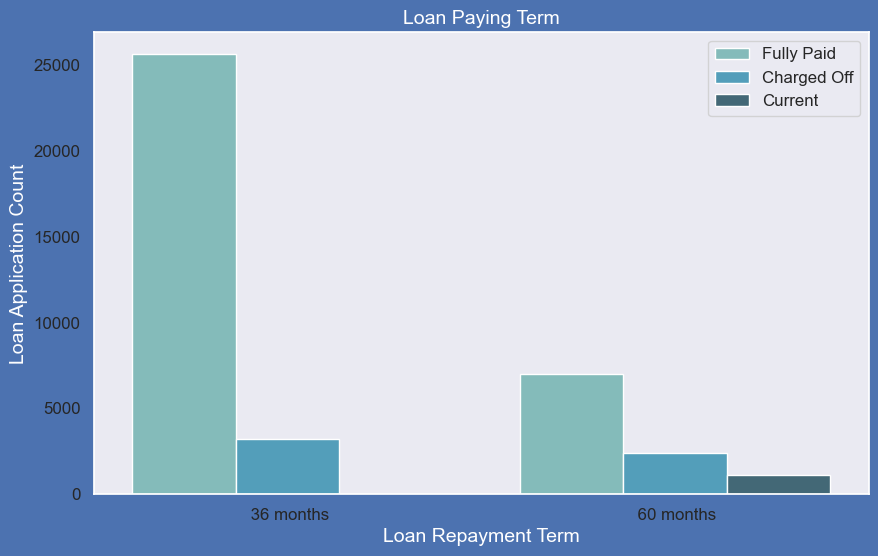

In [80]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=Data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [81]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = Data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


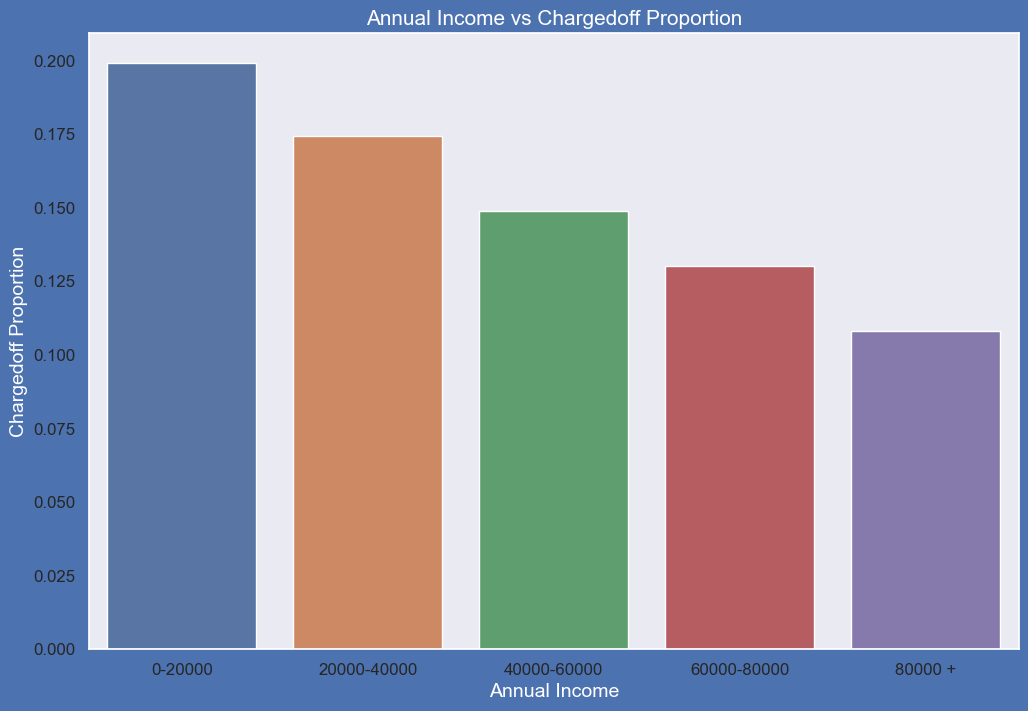

In [82]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [83]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = Data.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.25
2,12.5-16,1995,329,9354,11678,0.17
1,10-13,1224,269,8083,9576,0.13
0,0-10,825,77,11403,12305,0.07


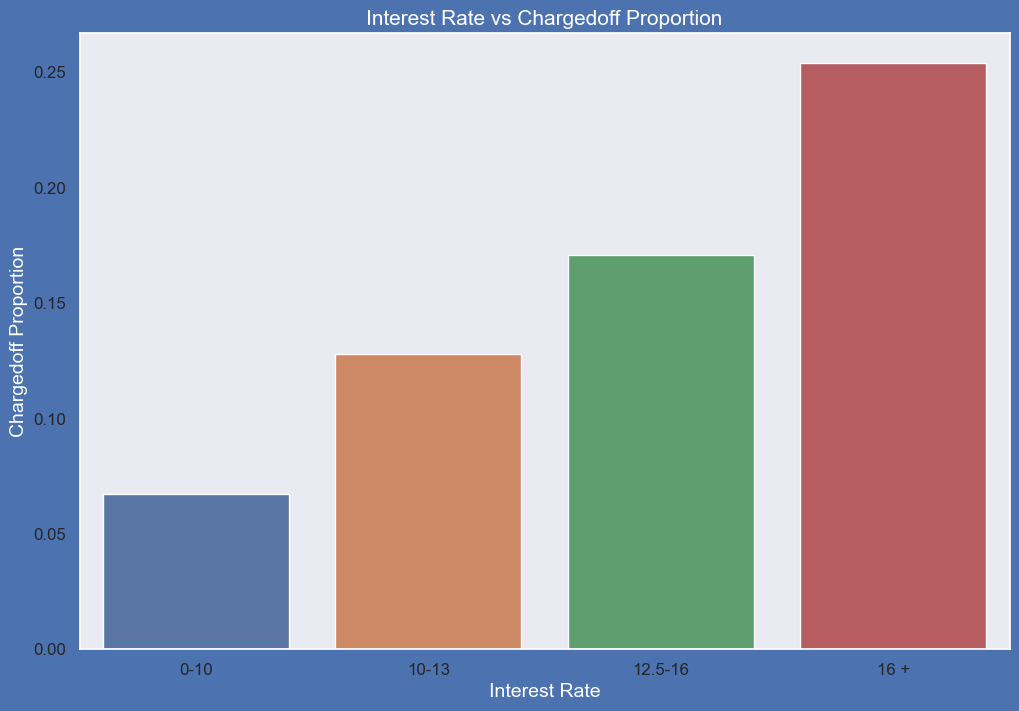

In [84]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

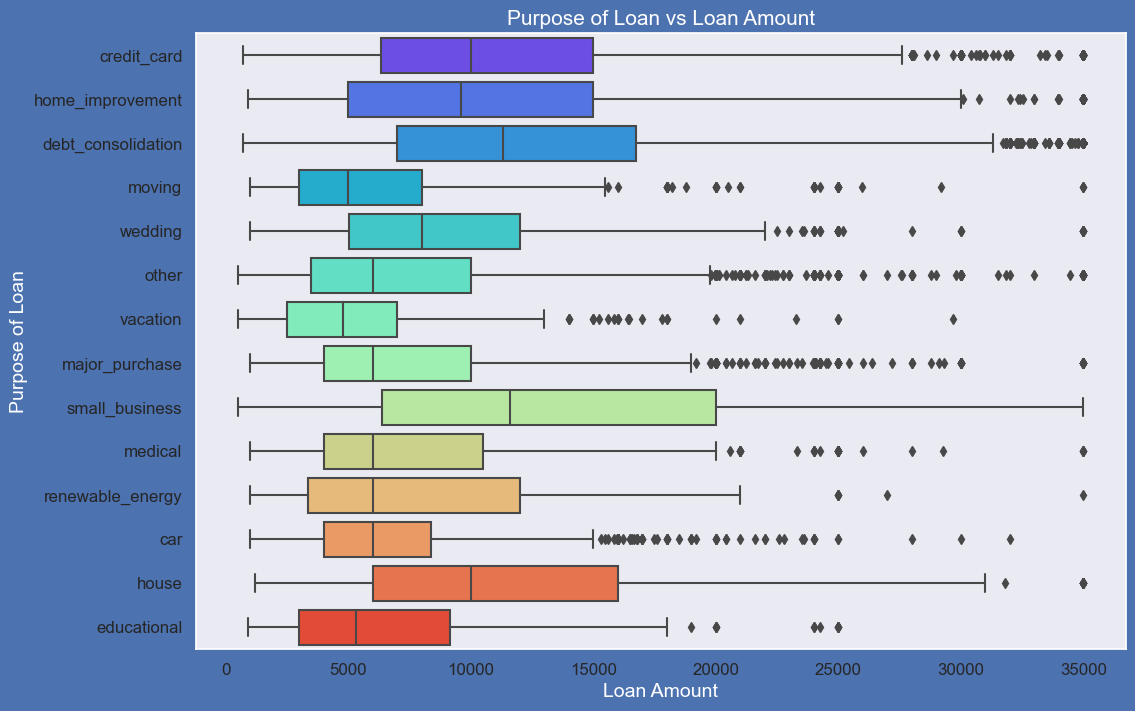

In [85]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# Box Plot

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =Data,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card comes 3rd.

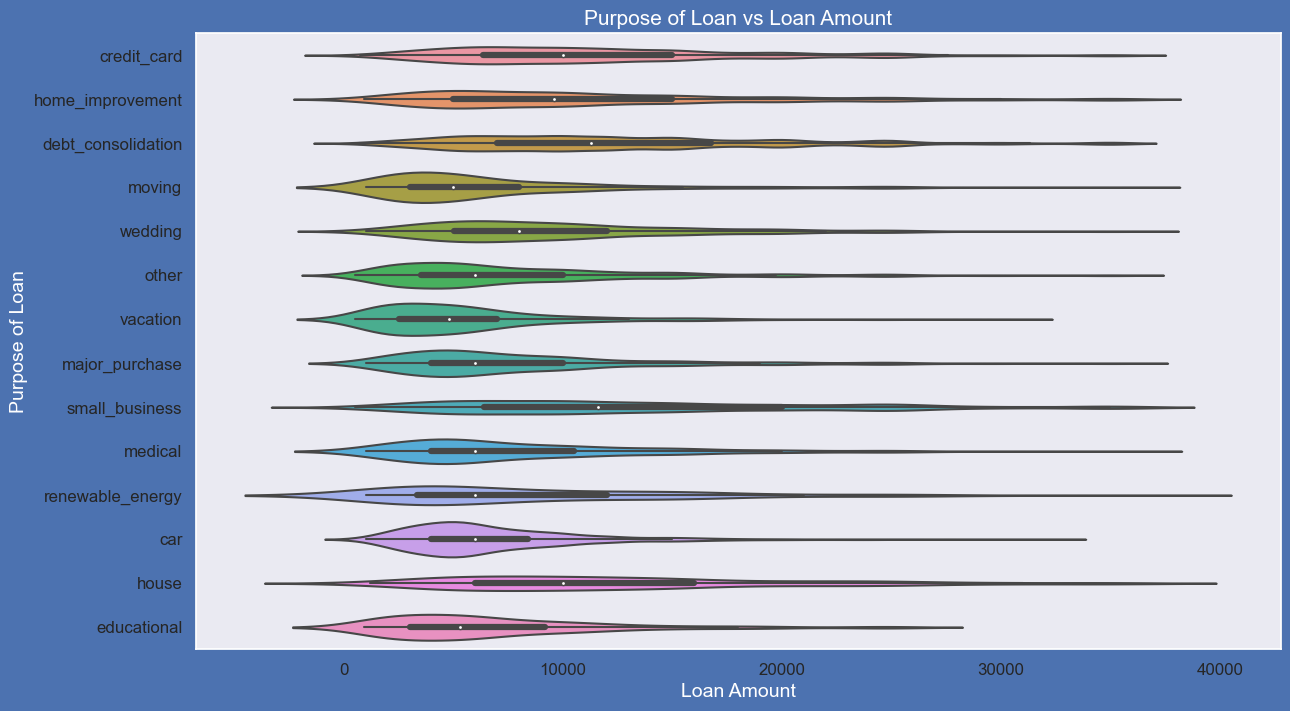

In [87]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =Data)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

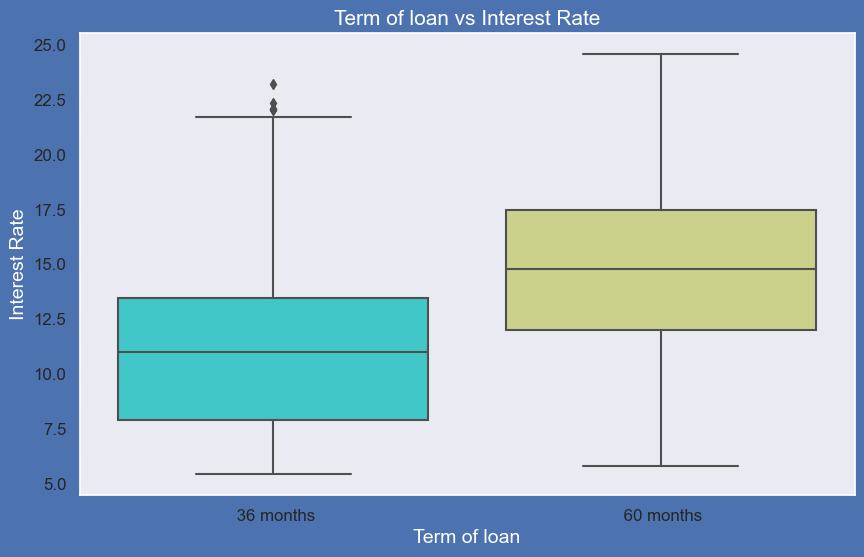

In [89]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =Data,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

In [32]:
Data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   loan_amnt                   39717 non-null  int64         
 2   funded_amnt                 39717 non-null  int64         
 3   funded_amnt_inv             39717 non-null  float64       
 4   term                        39717 non-null  object        
 5   int_rate                    39717 non-null  float64       
 6   installment                 39717 non-null  float64       
 7   grade                       39717 non-null  object        
 8   sub_grade                   39717 non-null  object        
 9   emp_length                  38642 non-null  float64       
 10  home_ownership              39717 non-null  object        
 11  annual_inc                  39717 non-null  float64   

In [33]:
Data.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10.00,...,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,2011,12


In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is named 'Data'
# Specify the columns you want to include
specified_columns = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
                     'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
                     'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
                     'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
                     'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
                     'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                     'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                     'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                     'collections_12_mths_ex_med', 'acc_now_delinq',
                     'chargeoff_within_12_mths', 'delinq_amnt']

# Selecting the specified columns
Data_specified = Data[specified_columns]

# Encoding categorical variables
categorical_cols_specified = Data_specified.select_dtypes(include=['object']).columns
for col in categorical_cols_specified:
    Data_specified[col] = Data_specified[col].astype('category')
    Data_specified[col] = Data_specified[col].cat.codes

# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')
Data_imputed_specified = pd.DataFrame(imputer.fit_transform(Data_specified), columns=Data_specified.columns)

# Splitting the data into features and target
X_specified = Data_imputed_specified.drop('loan_status', axis=1)
y_specified = Data_imputed_specified['loan_status']

# Train the Random Forest model
rf_model_specified = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_specified.fit(X_specified, y_specified)

# Get feature importances
feature_importances_specified = rf_model_specified.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df_specified = pd.DataFrame({'Feature': X_specified.columns, 'Importance': feature_importances_specified})
feature_importance_df_specified.sort_values(by='Importance', ascending=False, inplace=True)

# Visualizing the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_specified)
plt.title('Feature Importances in Lending Club Dataset (Specified Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'A'

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# And assuming 'target_column' is the name of your target variable

# Split the data into features and target
X = Data.drop('target_column', axis=1)  # replace 'target_column' with your actual target column name
y = Data['loan_status']

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [101]:
cols = ['sub_grade', 'emp_length', 'home_ownership',
        'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state']

for col in cols:
    if col in Data.columns:
        lbl = LabelEncoder()
        Data[col] = lbl.fit_transform(list(Data[col].values))
    else:
        print(f"Column '{col}' not found in the DataFrame.")

In [104]:
for col in cols:
    lbl = LabelEncoder()
    Data[col] = lbl.fit_transform(list(Data[col].values))


In [105]:
# Splitting the data into training and testing sets
X = Data.drop('loan_status', axis=1)
y = Data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [106]:
# Identifying numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

In [109]:
# Imputing missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

In [110]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [111]:
# Training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [112]:
# Making predictions and evaluating the model
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [113]:
# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9940233977619533
Confusion Matrix:
 [[1076    0   39]
 [   0  231    8]
 [   0    0 6510]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1115
           1       1.00      0.97      0.98       239
           2       0.99      1.00      1.00      6510

    accuracy                           0.99      7864
   macro avg       1.00      0.98      0.99      7864
weighted avg       0.99      0.99      0.99      7864



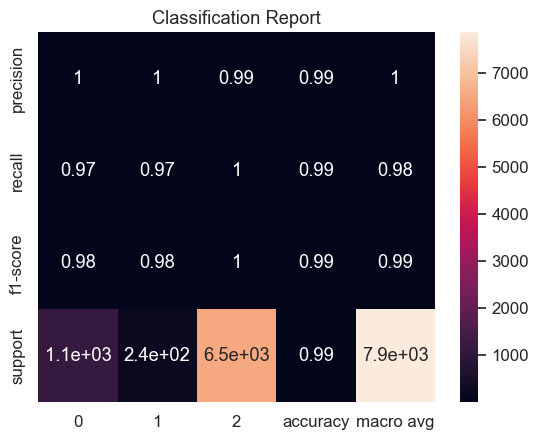

In [117]:
from sklearn.metrics import classification_report
import pandas as pd

def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    sns.heatmap(df_report.iloc[:-1, :].T, annot=True)
    plt.title("Classification Report")
    plt.show()

plot_classification_report(y_test, y_pred)